# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# **Loading Data**

In [4]:
# Loading the dataset
# The path '../sample_dataset/' means we are going one level up from the 'notebooks' directory
# and then into the 'sample_dataset' directory.

df = pd.read_csv('../sample_dataset/student_performance_dataset.csv')

In [5]:
# Display the first 5 rows to get an initial look at the data

print("Dataset loaded. First 5 rows:")
df.head()

Dataset loaded. First 5 rows:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# **Initial Data Exploration**

In [6]:
# Get a summary of the dataframe's structure and check for missing values

print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000

In [7]:
# Generate descriptive statistics for the numerical columns

print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


# **Exploratory Data Analysis (EDA) and Visualization**

In [9]:
print("--- Starting Exploratory Data Analysis ---")

# Selecting the variables of interest
relevant_cols = ['study_hours_per_day', 'attendance_percentage', 'exam_score']
subset_df = df[relevant_cols]

--- Starting Exploratory Data Analysis ---


Generating and saving the Correlation Matrix Heatmap...
Heatmap saved to the 'visualizations' folder.


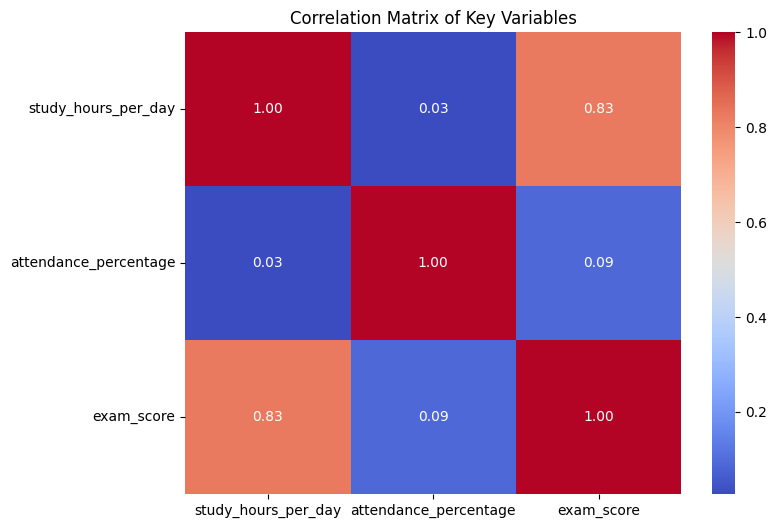

Correlation Matrix Values:
                       study_hours_per_day  attendance_percentage  exam_score
study_hours_per_day               1.000000               0.026264    0.825419
attendance_percentage             0.026264               1.000000    0.089836
exam_score                        0.825419               0.089836    1.000000


In [11]:
# --- Correlation Matrix and Heatmap ---
print("Generating and saving the Correlation Matrix Heatmap...")


# Calculate the correlation matrix
correlation_matrix = subset_df.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.savefig('../visualizations/heatmap.png')      # Save to visualizations folder
print("Heatmap saved to the 'visualizations' folder.")
plt.show()     # We use plt.show() to display the plot directly in the notebook

print("Correlation Matrix Values:")
print(correlation_matrix)

Generating and saving the Pairplot...
Pairplot saved to the 'visualizations' folder.


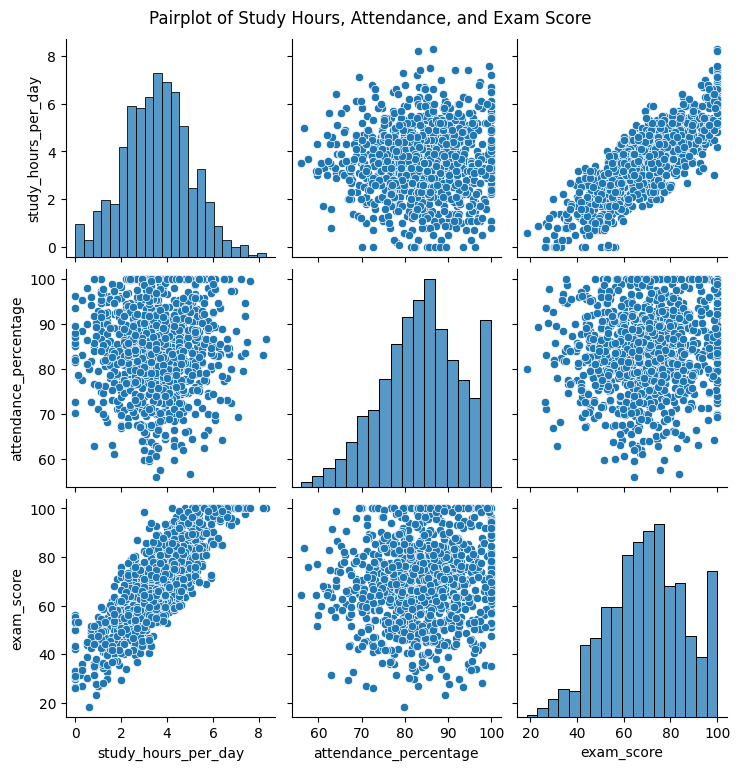

In [13]:
# --- Pairplot Visualization ---
print("Generating and saving the Pairplot...")


# Create a pairplot to visualize the relationships between the selected variables
pairplot_fig = sns.pairplot(subset_df)
pairplot_fig.fig.suptitle('Pairplot of Study Hours, Attendance, and Exam Score', y=1.02)
pairplot_fig.savefig('../visualizations/pairplot.png')     # Save to visualizations folder
print("Pairplot saved to the 'visualizations' folder.")
plt.show() # Display the plot in the notebook

Generating and saving the Scatter Plot with Regression Line...
Scatter plot saved to the 'visualizations' folder.


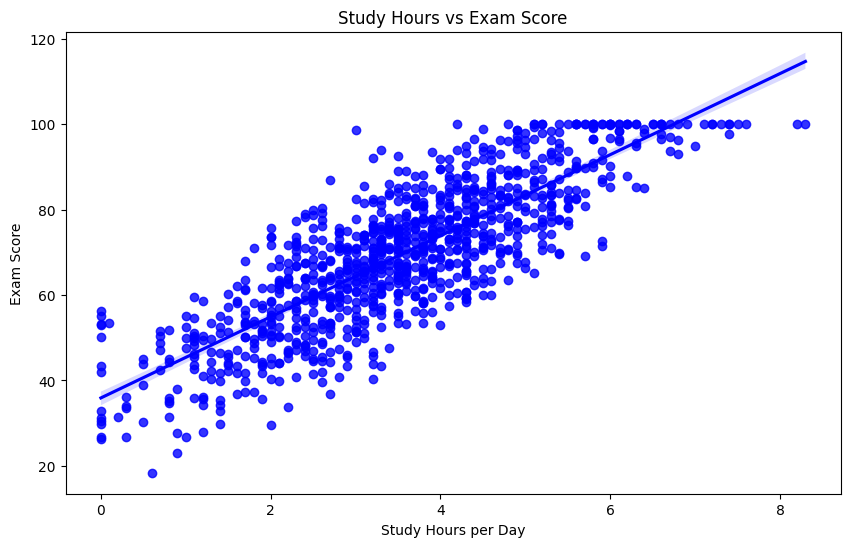

In [14]:
# --- Scatter Plot with Regression Line ---
print("Generating and saving the Scatter Plot with Regression Line...")


# Create a scatter plot with a regression line for study hours vs exam score
plt.figure(figsize=(10, 6))
sns.regplot(x='study_hours_per_day', y='exam_score', data=subset_df, marker='o', color='blue')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.savefig('../visualizations/study_hours_vs_exam_score.png')     # Save to visualizations folder
print("Scatter plot saved to the 'visualizations' folder.")
plt.show() # Display the plot in the notebook

# **Data Preprocessing**

In [15]:
# Define our features (X) and target (y)

X = df[['study_hours_per_day', 'attendance_percentage']]
y = df['exam_score']

In [16]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of training data (X_train): {X_train.shape}")
print(f"Shape of testing data (X_test): {X_test.shape}")

Shape of training data (X_train): (800, 2)
Shape of testing data (X_test): (200, 2)


# **Building and Training the Linear Regression Model**

In [17]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [18]:
# Train the model using our training data
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print("Model training complete.")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model training complete.
Model Coefficients: [9.49674629 0.14832312]
Model Intercept: 23.54197046703029


# **Evaluating the Model**

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [21]:
# Calculate the evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [22]:
print(f"R-squared (R²) score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R²) score: 0.6623
Mean Absolute Error (MAE): 7.4299


# **Making a Prediction on New Data**

In [23]:
# Create a new data point for the student
new_student_data = np.array([[4, 80]])  # 4 study hours, 80% attendance

In [24]:
# Use the model to predict the score
predicted_score = model.predict(new_student_data)

e:\Skills\GUVI HCL\Data Analytics\Student_Score_Predictor\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
print(f"Predicted score for a student with 4 study hours and 80% attendance: {predicted_score[0]:.2f}")

Predicted score for a student with 4 study hours and 80% attendance: 73.39
